I will try using PCA instead of the feature selection algorithms in the FeatureSelection.ipynb

import sys
sys.path.append("/Users/shamanthk/Documents/iomics/dowhy-preeclampsia")

In [2]:
import numpy as np
import pandas as pd
from EstimateEffect import *

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [3]:
betas_df = pd.read_csv('data/betas.csv')
pds_df = pd.read_csv('data/pds.csv')

df = preproc(betas_df, pds_df)

df.head()

,Group,A1BG,A2BP1,A2ML1,A4GALT,A4GNT,AADAT,AAK1,AANAT,AARS,...,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN22,ZUFSP,ZW10,ZWINT,ZYX,ZZEF1,ZZZ3
0,0,0.348367,0.319899,0.768433,0.081964,0.685641,0.060380,0.030600,0.628545,0.034695,...,0.155679,0.065414,0.059830,0.019980,0.035917,0.080395,0.079731,0.084788,0.154323,0.054018
1,0,0.364492,0.310907,0.764368,0.070794,0.692982,0.049903,0.030167,0.623489,0.039860,...,0.119980,0.059075,0.058748,0.017119,0.034855,0.067926,0.066641,0.068883,0.139299,0.043898
2,0,0.349403,0.305689,0.771950,0.070062,0.694961,0.054181,0.029743,0.626342,0.036626,...,0.124261,0.061837,0.057167,0.018410,0.037608,0.076475,0.077044,0.077043,0.143271,0.048421
3,0,0.371034,0.303553,0.779977,0.063303,0.698230,0.048508,0.025756,0.628486,0.035684,...,0.129721,0.056181,0.052445,0.015951,0.035129,0.068537,0.069168,0.068694,0.127377,0.045447
4,0,0.374402,0.284613,0.786321,0.059106,0.697250,0.046840,0.029264,0.632338,0.033920,...,0.121801,0.054721,0.050782,0.016837,0.036205,0.062236,0.062481,0.063668,0.121910,0.041457


In [4]:
df.shape

In [5]:
X = df.drop(columns=['Group'])
y = df['Group']

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(X)

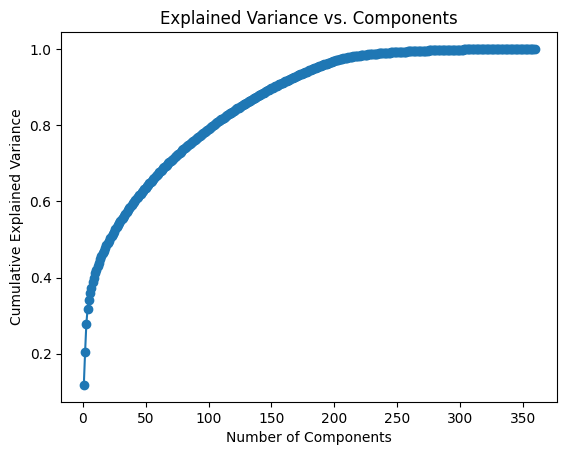

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Components')
plt.show()

In [10]:
pca = PCA(n_components=20)
reduced_data = pca.fit_transform(X)

In [11]:
components = pca.components_  # Shape: (n_components, n_features)

In [12]:
components

array([[ 8.68030010e-03,  1.72182436e-02, -8.35548168e-03, ...,
         8.78790716e-03,  1.54812568e-02,  5.36723380e-03],
       [-1.91907059e-02,  1.06739501e-02, -2.14184606e-02, ...,
         9.51718036e-04,  3.42944221e-04, -9.91197354e-05],
       [-1.62460731e-03,  2.37830469e-03,  2.41589750e-02, ...,
        -7.76727625e-04,  4.56764981e-03, -2.04000974e-03],
       ...,
       [ 2.76272954e-03,  5.60470463e-02, -1.44990838e-02, ...,
        -5.87467661e-03,  6.37033487e-03, -1.68717575e-03],
       [-1.31581483e-02, -6.44407282e-03, -5.09137713e-02, ...,
         4.76056165e-03,  6.17584151e-03, -2.74002448e-04],
       [-2.20283159e-03, -1.05296122e-02,  3.82352729e-03, ...,
        -5.02169250e-03,  1.98431359e-02, -5.18252650e-03]])

In [18]:
columns = [f'PC{i+1}' for i in range(20)]

In [19]:
columns

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20']

Notes for later:

1. I still need to extract the features/genes that are in each principal component
2. I then need to add in the labels - the preeclampsia condition
3. Check how I can add the CACNA1S gene in the dataset as well
4. what should I set n_features to be?